# 1. Wstęp <a name="1"></a>

## Zaimportowanie potrzebnych bibliotek

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import scipy.stats as st
import math
from scipy.stats import norm
from numba import njit

# DEFINICJE:
## - Hipoteza zerowa
Hipoteza podlegająca weryfikacji, może zostać odrzucona na korzyść drugiej hipotezy; szukamy podstaw do jej odrzucenia - jej prawdziwość poddajemy w wątpliwość.
## - Hipoteza alternatywna
Druga hipoteza.
## - Statystyka testowa
Funkcja tej próby, na której oprzemy nasz test hipotezy $H_{0}$ przy hipotezie alternatywnej.
## - Zbiór krytyczny C
Zbiór wartości statystyki testowej, prowadzących do odrzucenia hipotezy $H_{0}$ na korzyść hipotezy $H_{1}$. Wartości brzegowe zbioru C to <b>wartości krytyczne testu</b>.
## - Błąd I rodzaju
Odrzucenie hipotezy zerowej, gdy ta jest prawdziwa.
## - Błąd II rodzaju
Odrzucenie hipotezy alternatywnej, gdy prawdziwa jest zadana alternatywna wartość parametru.
## - Moc testu (dla $\theta$)
To prawdopodobieństwo odrzucenia (fałszywej) hipotezy zerowej i przyjęcia (prawdziwej) hipotezy alternatywnej, dla zadanej alternatywnej wartości parametru $\theta$.
## - P-wartość
Najmniejszy poziom istotności, przy którym zaobserwowana wartość statystyki testowej prowadzi do odrzucenia  hipotezy zerowej.

# zad.1
# DANE:
- n = 1000
- $\sigma ^2 = 0.2$
- $\alpha = 0.05$

## Zaimportowanie danych

In [8]:
dane = []
with open('dane1.csv', 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            wartosci = float(line)
            dane.append(wartosci)

print('Analizowane dane:', dane)

Analizowane dane: [1.6241197, 1.5161521, 1.1804207, 1.7595744, 1.3266727, 1.3102858, 1.165281, 1.4280735, 1.4294576, 1.3854567, 1.2820825, 1.1178898, 2.0524973, 1.7501681, 1.3782017, 1.4270241, 1.5217802, 1.4475725, 1.335928, 1.636807, 1.2223366, 1.8414476, 1.0973541, 1.3853331, 1.6245184, 1.4735831, 1.149389, 1.634367, 1.482649, 1.2870658, 1.530742, 1.6012315, 1.8868879, 1.4312435, 1.3911588, 1.3490389, 1.0646002, 1.5542761, 1.0391178, 1.3960325, 1.3949936, 1.619029, 0.89576371, 1.633615, 1.3461491, 1.1913976, 1.4482564, 1.4966705, 1.3651609, 1.1561103, 1.6912841, 1.4894684, 1.3086249, 1.6932735, 1.5234341, 1.1964969, 1.57421, 1.0909091, 1.2384321, 1.4803089, 1.5322528, 1.4640996, 1.0633947, 1.6137444, 1.7023514, 1.6834686, 1.335934, 1.3712205, 1.2465132, 1.5000412, 1.500425, 1.2957042, 1.6339091, 1.6204315, 1.5814252, 1.2993071, 1.1822996, 1.580445, 1.7394433, 1.1919748, 1.0083622, 1.7372216, 1.4376656, 1.6855613, 1.6471027, 1.2062843, 1.3636243, 1.2830117, 1.485936, 1.6832605, 1.461

## Obliczenie statystyki testowej $Z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$

In [9]:
srednia = sum(dane) / len(dane) #Średnia obliczona
print("Średnia arytmetyczna:", srednia)

Średnia arytmetyczna: 1.4554659542499997


In [10]:
kwadraty_roznic = [(x - srednia) ** 2 for x in dane]
wariancja = sum(kwadraty_roznic) / len(dane)
print("Wariancja:", wariancja)

Wariancja: 0.03958960772400233


In [11]:
odchylenie_standardowe = wariancja ** 0.5
print("Odchylenie standardowe:", odchylenie_standardowe)

Odchylenie standardowe: 0.19897137413206537


In [12]:
mu=1.5 #średnia hipotetyczna
n=1000
statystyka_testowa_srednia=(srednia-mu)/(odchylenie_standardowe/math.sqrt(n)) 
print("Statystyka testowa wynosi:", statystyka_testowa_srednia)

Statystyka testowa wynosi: -7.077853214134642


# TESTUJEMY $H_{0}: \mu = 1.5$, $H_{1}: \mu \neq 1.5$
Gdy zachodzi $H_{0}$ statystyka $Z$ ma w przybliżeniu standardowy rozkład normalny $\mathcal{N(0,1)}$

## Wyznaczenie wartości krytycznych 

In [13]:
poziom_istotnosci1 = 0.025
poziom_istotnosci2 = 0.975

# Oblicz wartości krytyczne
wart_kryt_1 = norm.ppf(poziom_istotnosci1)
wart_kryt_2 = norm.ppf(poziom_istotnosci2)

print("Wartość krytyczna 1:", wart_kryt_1)
print("Wartość krytyczna 2:", wart_kryt_2)


Wartość krytyczna 1: -1.9599639845400545
Wartość krytyczna 2: 1.959963984540054


## Weryfikacja hipotezy 

In [14]:
if statystyka_testowa_srednia <= wart_kryt_1  or statystyka_testowa_srednia >= wart_kryt_2:
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_1')
else:
    print('Nie odrzucamy hipotezy H_0')

Odrzucamy hipotezę H_0 na korzyść hipotezy H_1


### Zaobserwowana wartość statystyki testowej należy do zbioru krytycznego z $\alpha = 0.05$ (dane są statystycznie istotne na poziomie 0.05).
## Zbiór krytyczny:
### $$C = \{x: x \leq -z_{1-\frac{\alpha}{2}} \vee  x \geq z_{1-\frac{\alpha}{2}} \},$$ gdzie $x = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$, $\bar{X}$ to zaobserwowana wartość średniej w próbie, a $z_{1-\frac{\alpha}{2}}$ jest kwantylem rozkładu normalnego rzędu $1-\frac{\alpha}{2}$. W tym przypadku zbiór krytyczny to: $$C = (-\infty, -1.9599639845400545] \cup [1.959963984540054, \infty). $$

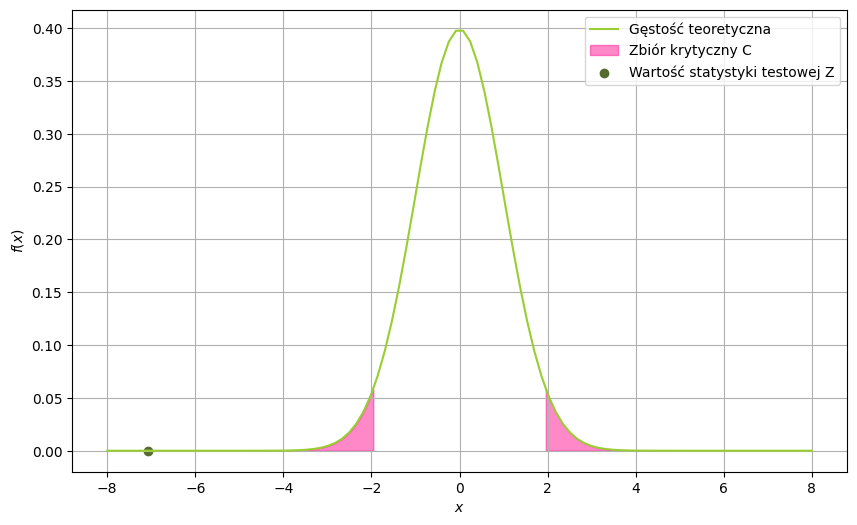

In [15]:
x = np.linspace(-8, 8, 100)
y = st.norm.pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x,y, label = 'Gęstość teoretyczna', color="yellowgreen")
px = np.linspace(-8, wart_kryt_1, 100)
plt.fill_between(px, st.norm.pdf(px), color='deeppink', alpha=0.5, label="Zbiór krytyczny C")
px = np.linspace(wart_kryt_2, 8, 100)
plt.fill_between(px, st.norm.pdf(px), color='deeppink', alpha=0.5)
plt.xlabel('$x$')
plt.ylabel("$f(x)$")
#plt.axvline(statystyka_testowa_srednia, color = "orange", label="wartość statystyki testowej")
plt.scatter(statystyka_testowa_srednia, 0, color="darkolivegreen", label="Wartość statystyki testowej Z")
plt.legend(loc='best')
plt.grid()
plt.show()

## P - wartość $$2P_{H_{0}}(Z \geq |x|)$$

In [16]:
p_value1 = 2 - 2*st.norm.cdf(abs(statystyka_testowa_srednia))
print(f'P-wartość hipotezy: {p_value1}')


P-wartość hipotezy: 1.4639400802707314e-12


P-wartość (p-value) jest miarą używaną w statystyce do oceny istotności statystycznej wyników testu hipotez. W powyższym przypadku p-wartość jest bardzo mała, zdecydowanie mniejsza niż 0.05, czyli nasza $\alpha$, co oznacza, że odrzucamy hipotezę zerową. Istnieje bardzo małe prawdopodobieństwo potwierdzenia hipotezy zerowej.

## Prawdopodobieństwo popełnienia błędu I rodzaju

In [17]:
al = [0.01, 0.05, 0.1]
alfa = 0.05
n = 1000
mu = 1.5
wariancja = 0.2 #parametry zgodne z H_0

def blad1_srednia(mu, wariancja, n):    
    
    b = []
    j = 0
    for i in range(1000):
        U = np.random.normal(mu, wariancja**(1/2), size=n)
        sr = np.mean(U)
        se = statistics.stdev(U)/np.sqrt(n) #błąd standardowy
        Z = (sr - mu)/se #statystyka testowa
        val_min = st.norm.ppf(alfa/2)
        val_max = st.norm.ppf(1-alfa/2)
            
        if val_min >= Z or Z >= val_max:
            j += 1
            b.append(Z)

    bladI = len(np.array(b))/1000
   
    return bladI

print(blad1_srednia(mu, wariancja, n))


0.062


# PRÓBA

1) Ustalamy alfa = 0.05, n = 1000
2) Generujemy X_1, ..., X_n - prostą próbę losową z rozkładu N(mu,sigma) (parametry zgodne z
H0)
3) Wyznaczamy wartość statystyki testowej Z (lub Chi^2 w drugim zadaniu)
4) Wyznaczmy obszar krytyczny (jego postać będzie zależała od postaci hipotezy alternatywnej,
czyli dla każdego z podpunktów zadania 1 oraz zadania 2 będziemy tutaj mieć inny obszar)
5) Sprawdzamy, czy statystyka Z (lub Chi^2 w drugim zadaniu) jest w obszarze krytycznym

6) Powtarzamy kroki 2)-5) N = 1000 razy i zliczamy ile razy statystyka testowa jest w obszarze
krytycznym

7) #{Z (lub Chi^2) w obszarze krytycznym}/N to symulacyjnie wyznaczony błąd I rodzaju

In [31]:
def blad_1(mu,sigma,n):


    x = np.random.normal(mu, sigma ** (1 / 2), size=(N, n))
    sr_x = np.mean(x, axis=1)
    odch = np.std(x, axis=1, ddof=1)
    Z = (sr_x - mu) / (odch / np.sqrt(n))

    val_max = st.norm.ppf(1 - (1 / 2) * alfa)
    val_min = st.norm.ppf(alfa / 2)

    blad_1 = np.logical_or(Z <= val_min, Z >= val_max).mean()
    return blad_1

alfa = 0.05
n = 1000
N = 1000
mu = 1.5
sigma = 0.2

[0.056, 0.053, 0.059, 0.044, 0.068, 0.06, 0.049, 0.05, 0.059, 0.05, 0.066, 0.045, 0.038, 0.048, 0.045, 0.045, 0.055, 0.052, 0.042, 0.068, 0.059, 0.054, 0.031, 0.052, 0.043, 0.048, 0.049, 0.049, 0.044, 0.048, 0.047, 0.031, 0.053, 0.047, 0.05, 0.054, 0.053, 0.049, 0.047, 0.04, 0.043, 0.049, 0.048, 0.052, 0.055, 0.05, 0.056, 0.052, 0.044, 0.052, 0.047, 0.044, 0.052, 0.047, 0.076, 0.051, 0.052, 0.044, 0.057, 0.054, 0.049, 0.04, 0.052, 0.053, 0.046, 0.04, 0.048, 0.055, 0.04, 0.054, 0.049, 0.049, 0.059, 0.052, 0.045, 0.038, 0.053, 0.043, 0.044, 0.042, 0.061, 0.056, 0.051, 0.053, 0.051, 0.045, 0.055, 0.046, 0.055, 0.057, 0.054, 0.044, 0.06, 0.047, 0.055, 0.035, 0.055, 0.054, 0.042, 0.05]
0.05


{'whiskers': [<matplotlib.lines.Line2D at 0x147d6c1c040>,
 'caps': [<matplotlib.lines.Line2D at 0x147d6c1c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x147d6c16d60>],
 'medians': [<matplotlib.lines.Line2D at 0x147d6c1cac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x147d6c1cd60>],
 'means': []}

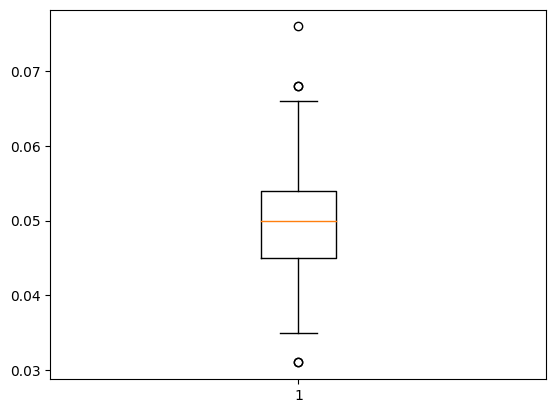

In [37]:
bledy = [blad_1(mu,sigma,n) for _ in range(100) ]
print(bledy)
print(np.median(bledy))
plt.boxplot(bledy)

## Wykresy ramkowe

TypeError: object of type 'float' has no len()

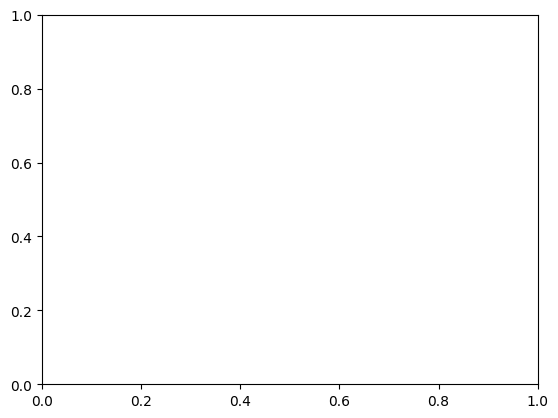

In [20]:
al = [0.01,0.05,0.1]
lista = []
for alfa in al:
    
    lista.append([blad_1(mu,sigma,n) for i in range(100)])

plt.boxplot(lista, labels=alfa)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()

## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl = [blad1_srednia(mu, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Błąd I rodzaju (popełnienie błędu typu I):
- Błąd I rodzaju występuje, gdy odrzucamy hipotezę zerową, pomimo że jest ona prawdziwa.
- Prawdopodobieństwo popełnienia błędu I rodzaju oznaczane jest jako poziom istotności.
- Wniosek: Jeśli poziom istotności (α) jest niski, to prawdopodobieństwo popełnienia błędu I rodzaju jest również niskie, co oznacza, że podejmowanie decyzji o odrzuceniu hipotezy zerowej jest bardziej rygorystyczne.
### Wykres błędu I rodzaju:
- Na wykresie błędu I rodzaju na osi pionowej przedstawia się prawdopodobieństwo popełnienia błędu I rodzaju ($\alpha$), czyli poziom istotności.
- Na osi poziomej można przedstawić różne wartości parametru lub efektu testowanego w hipotezie alternatywnej.
Wykres przedstawia, jak zmienia się prawdopodobieństwo błędu I rodzaju w zależności od badanego parametru.

## Prawdopodobieństwo popełnienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = len(dane)
wariancja = 0.2
sred = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55]
prawdziwa_srednia = 1.5

def blad2_srednia(srednia, wariancja, n):    
    b2 = []
    j = 0

    for i in range(1000):

        V = np.random.normal(srednia, wariancja**(1/2), size=n)
        srednia2 = np.mean(V)
        odchylenie = np.std(V, ddof=1) 
        Z = (srednia2 - prawdziwa_srednia) / (odchylenie/np.sqrt(n))

        val_min2 = st.norm.ppf(alfa/2)
        val_max2 = st.norm.ppf(1-alfa/2)
            
        if (val_min2 > Z) or (Z > val_max2):
            j += 1
            b2.append(Z) 

    bladII = len(np.array(b2))/n
    return bladII

## Wykresy ramkowe

In [ ]:
lista_II_sred = []
for srednia in sred:
    lista_II_sred.append([blad2_srednia(srednia,wariancja,n) for i in range(100)])



plt.boxplot(lista_II_sred, labels=sred)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\mu$ przy hipotezie alternatywnej $H_{1}: \mu \neq 1.5$')
plt.xlabel('wartości $\mu$')
plt.ylabel('wartości błędu')
plt.show()

## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [blad2_srednia(srednia, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Błąd II rodzaju (popełnienie błędu typu II):
- Błąd II rodzaju występuje, gdy nie odrzucamy hipotezy zerowej, mimo że jest ona fałszywa.
- Prawdopodobieństwo popełnienia błędu II rodzaju zależy od wielkości efektu, wielkości próbki i poziomu istotności.
- Wniosek: Im większe prawdopodobieństwo popełnienia błędu II rodzaju, tym mniejsza moc testu, czyli zdolność testu do wykrywania istotnych różnic, jeśli istnieją.
### Wykres błędu II rodzaju:
- Na wykresie błędu II rodzaju na osi pionowej przedstawia się prawdopodobieństwo popełnienia błędu II rodzaju $\beta$.
- Wykres pokazuje, jak zmienia się prawdopodobieństwo błędu II rodzaju w zależności od badanego parametru.


## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [(1-blad2_srednia(srednia, wariancja, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

### Moc testu (power)
Jest to prawdopodobieństwo odrzucenia hipotezy zerowej, gdy hipoteza alternatywna jest prawdziwa. Wykres mocy testu jest narzędziem graficznym, które ilustruje zależność między mocą testu a różnymi wartościami parametrów lub efektów.
### Wykres mocy testu
- Im bardziej pochyła krzywa na wykresie, tym większa moc testu, czyli większa zdolność testu do wykrywania istotnych różnic.
- Im większa wartość parametru, tym większa moc testu, co oznacza większą zdolność do wykrywania tych różnic.
- Wykres mocy testu może pomóc w określeniu minimalnej wartości parametru, którą test jest w stanie wykryć jako istotną.

# TESTUJEMY $H_{0}: \mu = 1.5$, $H_{2}: \mu > 1.5$
Gdy zachodzi $H_{0}$ statystyka $Z$ ma rozkład $\mathcal{N(0,1)}$.
## Wyznaczenie wartości krytycznej

In [ ]:
poziom_istotnosci3 = 0.05

wart_kryt_3 = norm.ppf(1-poziom_istotnosci3)
print(f'Wartość krytyczna: {wart_kryt_3}')

## Weryfikacja hipotezy

In [ ]:
if statystyka_testowa_srednia >= wart_kryt_3 :
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_2.')
else:
    print('Nie odrzucamy hipotezy H_0.')

## Zbiór krytyczny:
### $$C = \{x: x \geq z_{1-\alpha}\},$$ gdzie $x = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$, $\bar{X}$ to zaobserwowana wartość średniej w próbie, a $z_{1-\alpha}$ jest kwantylem rozkładu normalnego rzędu $1-\alpha$. W tym przypadku zbiór krytyczny to: $C = [1.6448536269514722, \infty). $

In [ ]:
x = np.linspace(-8, 8, 100)
y = st.norm.pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x,y, label = 'Gęstość teoretyczna', color="yellowgreen")
px = np.linspace(wart_kryt_3, 8, 100)
plt.fill_between(px, st.norm.pdf(px), color='deeppink', alpha=0.5, label="Zbiór krytyczny C")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
#plt.axvline(statystyka_testowa_srednia, color = "orange", label="Wartość statystyki testowej Z")
plt.scatter(statystyka_testowa_srednia, 0, color="darkolivegreen", label="Wartość statystyki testowej Z")
plt.legend(loc='best')
plt.grid()
plt.show()


## P - wartość $$ P_{H_{0}}(Z \geq x)$$


In [ ]:
p_value2 = 1 -st.norm.cdf(statystyka_testowa_srednia)

print(f'P-wartość hipotezy: {p_value2}')

### P-wartość jest bardzo bliska 1, wynosi 0.999999999999268, więc prawidłowo przyjęliśmy hipotezę zerową.

## Prawdopodobieństwo popełnienia błęu I rodzaju

In [ ]:
al = [0.001, 0.01, 0.05, 0.1]
alfa = 0.05
n = 1000
mu = 1.5
wariancja = 0.2 #parametry zgodne z H_0

def blad1_srednia_2(mu, wariancja, n):    
    
    b = []
    j = 0
    for i in range(100):
        U = np.random.normal(mu, wariancja**(1/2), size=n)
        sr = np.mean(U)
        se = statistics.stdev(U)/np.sqrt(n) #błąd standardowy
        Z = (sr - mu)/se #statystyka testowa
        value = st.norm.ppf(1-alfa)
            
        if Z >= value:
            j += 1
            b.append(Z)

    bladI = len(np.array(b))/n
    return bladI

bledy1 = [blad1_srednia_2(mu,wariancja**(1/2),n) for _ in range(100)]
print(bledy1)

## Wykresy ramkowe

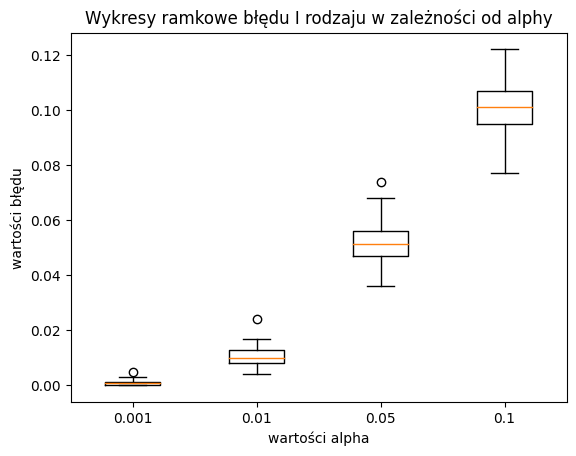

In [22]:
lista = []
for alfa in al:
    lista.append([blad1_srednia_2(mu,wariancja ,n) for i in range(100)])
    
plt.boxplot(lista, labels=al)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()


## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl = [blad1_srednia_2(mu, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Na powyższych wykresach ramkowych i histogramach widać, że wartość błędu zbliżona jest do $\alpha$. 

## Prawdopodobieństwo popełenienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = len(dane)
wariancja = 0.2
sred = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55]
prawdziwa_srednia = 1.5

def blad2_srednia_2(srednia, wariancja, n):    
    b2 = []
    j = 0

    for i in range(1000):

        V = np.random.normal(srednia, wariancja**(1/2), size=n)
        srednia2 = np.mean(V)
        odchylenie = np.std(V, ddof=1) 
        Z = (srednia2 - prawdziwa_srednia) / (odchylenie/np.sqrt(n))

        value = st.norm.ppf(1-alfa)
            
        if Z >= value:
            j += 1
            b2.append(Z) 

    bladII = len(np.array(b2))/n
    return bladII

## Wykresy ramkowe

In [ ]:
lista2_srednia_2 = []
for srednia in sred:
    lista2_srednia_2.append([blad2_srednia_2(srednia,wariancja,n) for i in range(100)])
plt.boxplot(lista2_srednia_2, labels=sred)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\mu$')
plt.xlabel('wartości $\mu$')
plt.ylabel('wartości błędu')
plt.show()


## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [blad2_srednia_2(srednia, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()


#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większe $\mu$ tym większa jest wartość błędu II rodzaju.

## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [(1-blad2_srednia_2(srednia, wariancja, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większe $\mu$ tym mniejsza jest moc testu.

# TESTUJEMY $H_{0}: \mu = 1.5$, $H_{3}: \mu < 1.5$
Gdy zachodzi $H_{0}$ statystyka $Z$ ma rozkład $\mathcal{N(0,1)}$.

## Wyznaczenie wartości krytycznej


In [ ]:
poziom_istotnosci4 = 0.05

wart_kryt_4 = st.norm.ppf(poziom_istotnosci4) 
print(f'wartość krytyczna dla kwantylu 0.05: {wart_kryt_4}')


## Weryfikacja hipotezy


In [ ]:
if statystyka_testowa_srednia <= wart_kryt_4 :
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_3.')
else:
    print('Nie odrzucamy hipotezy H_0.')


## Zbiór krytyczny:
### $$C = \{x: x \leq -z_{1-\alpha}\},$$ gdzie $x = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$, $\bar{X}$ to zaobserwowana wartość średniej w próbie, a $z_{1-\alpha}$, to kwantul rozkładu normalnego rzędu $1-\alpha$. W tym przypadku zbiór krytyczny to: $$C = [-\infty, -1.6448536269514729]. $$

In [ ]:
x = np.linspace(-8, 8, 100)
y = st.norm.pdf(x)
plt.figure(figsize=(10,6))
plt.plot(x,y,label = 'Gęstość teoretyczna', color="yellowgreen")
px = np.linspace(-8, wart_kryt_4, 100)
plt.fill_between(px, st.norm.pdf(px), color='deeppink', alpha=0.5, label="Zbiór krytyczny C")
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.scatter(statystyka_testowa_srednia, 0, color="darkolivegreen", label="Wartość statystyki testowej Z")
plt.legend(loc='best')
plt.grid()
plt.show()

## P - wartość $$ P_{H_{0}}(Z \leq x)$$


In [ ]:
p_value3 = st.norm.cdf(statystyka_testowa_srednia)

print(f'P-wartość hipotezy: {p_value3}')

### P-wartość w powyższym przypadku wynosi około $7.32*10^{-13}$, co stanowczo ptrzemawia za odrzuceniem hipotezy zerowej. Została ona więc codrzucona słusznie

## Prawdopodobieństwo popełneinia błędu I rodzaju

In [ ]:
al = [0.001, 0.01, 0.05, 0.1]
alfa = 0.05
n = 1000
mu = 1.5
wariancja = 0.2 #parametry zgodne z H_0

def blad1_srednia_3(mu, wariancja, n):    
    
    b = []
    j = 0
    for i in range(1000):
        U = np.random.normal(mu, wariancja**(1/2), size=n)
        sr = np.mean(U)
        se = statistics.stdev(U)/np.sqrt(n) #błąd standardowy
        Z = (sr - mu)/se #statystyka testowa
        value = -st.norm.ppf(1-alfa)
            
        if Z <= value:
            j += 1
            b.append(Z)

    bladI = len(np.array(b))/1000
    return bladI

print(blad1_srednia_3(mu, wariancja, n))


## Wykresy ramkowe

In [ ]:
lista = []
for alfa in al:
    lista.append([blad1_srednia_3(mu,wariancja ,n) for i in range(100)])
    
plt.boxplot(lista, labels=al)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()


## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl = [blad1_srednia_3(mu, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Na każdym z wykresów widzimy, że wartość błędu zblżona jest do $\alpha$.

## Prawdopodobieństwo popełnienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = len(dane)
wariancja = 0.2
sred = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55]
prawdziwa_srednia = 1.5

def blad2_srednia_3(srednia, wariancja, n):    
    b2 = []
    j = 0

    for i in range(1000):

        V = np.random.normal(srednia, wariancja**(1/2), size=n)
        srednia2 = np.mean(V)
        odchylenie = np.std(V, ddof=1) 
        Z = (srednia2 - prawdziwa_srednia) / (odchylenie/np.sqrt(n))

        value_2 = -st.norm.ppf(1-alfa)
            
        if Z <= value_2:
            j += 1
            b2.append(Z) 

    bladII = len(np.array(b2))/n
    return bladII


## Wykresy ramkowe

In [ ]:
lista2_srednia_3 = []
for srednia in sred:
    lista2_srednia_3.append([blad2_srednia_3(srednia,wariancja,n) for i in range(100)])
plt.boxplot(lista2_srednia_3, labels=sred)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\mu$')
plt.xlabel('wartości $\mu$')
plt.ylabel('wartości błędu')
plt.show()



## Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [blad2_srednia_3(srednia, wariancja, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()


## Na powyższych wykresach udowadniamy, że dla lewostronnego przypadku powinniśmy testować tylko wartości $\mu$ większe od hipotetycznego $\mu =1.5$. Dla wartości większych od $1.5$ oterzymujemy wartości błędu bliskie 0, a dla mniejszych prawie 1.

## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\mu$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, srednia in enumerate(sred):
    bl2 = [(1-blad2_srednia_3(srednia, wariancja, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\mu = {srednia}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

### Dla wartości większych od $1.5$ osiągamy bardzo duża moc testu, a dla mniejszych jest ona znikoma.

# zad.2

# DANE:
- n = 1000
- $\mu = 0.2$
- $\alpha = 0.05$

## Obliczenie statystyki testowej $\chi^{2} = \frac{(n-1)S^{2}}{\sigma^{2}}$

In [ ]:
data = np.loadtxt(f"dane2_2.txt", delimiter=',')

n = len(data)

#print('Analizowane dane:', dane)
a = np.mean(data)
print(data)

In [ ]:
mu = 0.2
sigma2 = statistics.variance(data)
print(f"Wariancja: {sigma2}")

In [ ]:
sigma0 = 1.5 #wariancja hipotetyczna
N=1000
statystyka_testowa_wariancja = ((n-1)*sigma2)/sigma0
print(f'Statystyka testowa: {statystyka_testowa_wariancja}')

# TESTUJEMY $H_{0}: \sigma^{2} = 1.5$, $H_{1}: \sigma^{2} \neq 1.5$
Gdy zachodzi $H_{0}$ statystyka $\chi^{2}$ ma rozkład $\mathcal{\chi^{2}}$ z $n-1$ stopniami swobody.

## Wyznaczenie wartości krytycznych 

In [ ]:
poziom_istotnosci1 = 0.025
poziom_istotnosci2 = 0.975
stopnie_swobody = 999

wk1 = st.chi2.ppf(poziom_istotnosci1, stopnie_swobody) #wartość krytyczna
print(f'wartość krytyczna dla kwantylu 0.025: {wk1}')

wk2 = st.chi2.ppf(poziom_istotnosci2, stopnie_swobody) #wartość krytyczna
print(f'wartość krytyczna dla kwantylu 0.975: {wk2}')

## Weryfikacja hipotezy 

In [ ]:
if statystyka_testowa_wariancja <= wk1 or statystyka_testowa_wariancja >= wk2:
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_1.')
else:
    print('Nie odrzucamy hipotezy H_0')

### Zaobserwowana wartość statystyki testowej należy do zbioru krytycznego z $\alpha = 0.05$ (dane są statystycznie istotne na poziomie 0.05).

## Zbiór krytyczny:
### $$C = \{x^{2}: x^{2} \leq \chi^{2}_{\alpha/2,n-1} \vee  x^{2} \geq \chi^{2}_{1-\alpha/2,n-1} \},$$ gdzie $$x^{2} = \frac{(n-1)s^{2}}{\sigma^{2}},$$ $s^{2}$ to zaobserwowana wartość wariancji w próbie, a $\chi^{2}_{\beta, n-1}$ jest kwantylem rzędu $\beta$ z $n-1$ stopniami swobody. W tym przypadku zbiór krytyczny to: $$C = (-\infty, 913.3] \cup [1088.5, \infty). $$

In [ ]:
plt.figure(figsize=(10,6))
x=np.linspace(800,1200,1200)
df = 999
x_right = np.linspace(800,wk1,100)
x_left = np.linspace(wk2,1200,100)

y = st.chi2.pdf(x,df,loc=0, scale=1)
plt.plot(x,y, label = 'Gęstość teoretyczna', color="darkturquoise")
plt.fill_between(x_right,0, st.chi2.pdf(x_right,df,loc=0, scale=1), color='deeppink', alpha=0.5, label="Zbiór krytyczny $C$")
plt.fill_between(x_left,0, st.chi2.pdf(x_left,df,loc=0, scale=1), color='deeppink',alpha=0.5)
plt.scatter(statystyka_testowa_wariancja, 0, color="darkslategray", label="Wartość statystyki testowej $\chi$",marker='o', alpha=1)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc='best')
plt.grid()
plt.show()
print(statystyka_testowa_wariancja)

## P - wartość $$2P_{H_{0}}(\chi^2 \geq |x^{2}|)$$

In [ ]:
#p_value1 = 2 - 2*st.chi2.cdf(statystyka_testowa_wariancja,df,loc=0, scale=1)
p_value1 = 2*st.chi2.sf(statystyka_testowa_wariancja,df,loc=0, scale=1)

print(f'P-wartość hipotezy: {p_value1}')


#### Im mniejsza jest p-wartość, tym bardziej możemy być pewni przekonania o fałszywości hipotezy zerowej i prawdziwości hipotezy alternatywnej. P-wartość w powyższym przykładzie wyniosła około $0.015$. Jest to wartość mniejsza od poziomu istotności, zatem prawidłowo odrzuciliśmy hipotezę zerową $H_{0}: \sigma^{2} = 1.5$ na korzyść hipotezy alternatywnej $H_{1}: \sigma^{2} \neq 1.5$.

##  - Co się stanie, gdy zwiększymy lub zmmiejszymy poziom istotności?

#### Im wyższy jest poziom istotności, tym większa jest szansa, że statystyka testowa znajdzie się w zbiorze krytycznym i - w konsekwencji - większa jest szansa odrzucenia $H_{0}$.

## Prawdopodobieństwo popełnienia błędu I rodzaju

In [39]:
#alfa = 0.05
al = [0.001, 0.01, 0.05, 0.1]
n = 1000
m = 0.2
s = 1.5 #parametry zgodne z H_0

def blad1(m, s, n):    
    
    b = []
    j = 0
    for i in range(1000):
        U = np.random.normal(m, s**(1/2), size=n)
        sr = np.mean(U)
        var = statistics.variance(U, sr)
        Chi = ((n-1)*var)/s #statystyka testowa
        val_min = st.chi2.ppf(1-alfa/2, n-1)
        val_max = st.chi2.ppf(alfa/2, n-1)
            
        if val_min <= Chi or Chi <= val_max:
            j += 1
            b.append(Chi)

    bladI = len(np.array(b))/1000
    return bladI

blad1(m,s,n)

0.053

### Wykresy ramkowe

In [ ]:
lista = []
for alfa in al:
    lista.append([blad1(m,s,n) for i in range(100)])
    

In [ ]:
plt.boxplot(lista, labels=al)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()

### Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl = [blad1(m, s, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

## Wnioski
Błąd pierwszego rodzaju jest jednocześnie poziomem istotności testu. Prawdopodobieństwo jego popełnienia musi być większe od zera, jednocześnie nie może być ono zbyt małe (np. zerowe - wtedy hipoteza zerowa nie byłaby nigdy odrzucana, nawet jeśli byłaby fałszywa). <br>
Na przedstawionych powyżej wykresach ramkowych i histogramach możemy zauważyć, że w naszej symluacji wartość błędu I rodzaju zawsze zbliżona jest do poziomu istotności $\alpha$.  

## Prawdopodobieństwo popełnienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = 1000
m2 = 0.2
sig = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55] #parametry zgodne z H_1
true_s2 = 1.5

def blad2(m2, s2, n):    
    b2 = []
    j = 0

    for i in range(1000):

        V = np.random.normal(m2, s2**(1/2), size=n)
        sr2 = np.mean(V)
        var2 = np.var(V)
        Chi2 = ((n-1)*var2)/true_s2 #statystyka testowa
        
        val_min2 = st.chi2.ppf(alfa/2, n-1)
        val_max2 = st.chi2.ppf(1-alfa/2, n-1)
            
        if (val_min2 > Chi2) or (Chi2 > val_max2):
            j += 1
            b2.append(Chi2) 

    bladII = len(np.array(b2))/1000
    return bladII


### Wykresy ramkowe

In [ ]:
lista2 = []
for s2 in sig:
    lista2.append([blad2(m2,s2,n) for i in range(100)])

In [ ]:
plt.boxplot(lista2, labels=sig)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\sigma^{2}$')
plt.xlabel('wartości $\sigma^{2}$')
plt.ylabel('wartości błędu')
plt.show()

### Możemy zauważyć, że im bliżej wartości $\sigma^{2}$ z hipotezy zerowej, tym mniejszy jest błąd II rodzaju.

### Histogramy

In [ ]:

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\sigma^{2}$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl2 = [blad2(m2, s2, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()


### Prawdopodobieństwo błędu II rodzaju przy zadanej alternatywnej wartości parametru będącego przedmiotem testowania, umożliwia natychmiastowe określenie mocy testu $m = 1 - \text{błąd II rodzaju}$.

## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\sigma^{2}$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl2 = [(1-blad2(m2, s2, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl2, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

#### Niski poziom istotności testu wiąże się z nikłą mocą testu, gdy jest prawdziwa hipoteza alternatywna. Przy ustalonej wartości parametru ze zbioru alternatyw  i przu ustalonej liczności $n$ próby losowej zwiększenie mocy testu może się odbywać jedynie kosztem zwiększania poziomu istotności. <br>
#### Ogólniej: przy zadanym poziomie istotności i ustalonej liczności próby losowej moc testu rośnie wraz ze wzrostem odległości między alternatywną wartością parametru oraz wartością tego parametru zadaną przez $H_{0}$. Bardzo dobrze widać to na przedsrawionych powyżej histogramach. <br>
#### W przeprowadzonej symulacji moc testu dla badanych wartości $\sigma^{2}$ przyjmowała wartości około $(0.86, 0.96)$, co jest bardzo dobrym wynikiem, który pozwoli wykryć różnice i uniknąć błędu II rodzaju.

# TESTUJEMY $H_{0}: \sigma^{2} = 1.5$, $H_{2}: \sigma^{2} > 1.5$
Gdy zachodzi $H_{0}$ statystyka $\chi^{2}$ ma rozkład $\mathcal{\chi^{2}}$ z $n-1$ stopniami swobody.

## Wyznaczenie wartości krytycznej

In [ ]:
poziom_istotnosci3 = 0.05
stopnie_swobody = 999

wk3 = st.chi2.ppf(1-poziom_istotnosci3, stopnie_swobody) #wartość krytyczna
print(f'wartość krytyczna dla kwantylu 0.95: {wk3}')

## Weryfikacja hipotezy

In [ ]:
if statystyka_testowa_wariancja >= wk3 :
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_2.')
else:
    print('Nie odrzucamy hipotezy H_0.')

### Zaobserwowana wartość statystyki testowej należy do zbioru krytycznego z $\alpha = 0.05$ (dane są statystycznie istotne na poziomie 0.05).

## Zbiór krytyczny:
### $$C = \{x^{2}: x^{2} \geq \chi^{2}_{1-\alpha,n-1}\},$$ gdzie $$x^{2} = \frac{(n-1)s^{2}}{\sigma^{2}},$$ $s^{2}$ to zaobserwowana wartość wariancji w próbie, a $\chi^{2}_{\beta, n-1}$ jest kwantylem rzędu $\beta$ z $n-1$ stopniami swobody. W tym przypadku zbiór krytyczny to: $$C = [1073.6, \infty) $$

In [ ]:
plt.figure(figsize=(10,6))

x=np.linspace(800,1200,1200)
df = 999

x_left2 = np.linspace(wk3,1200,100)
y2 = st.chi2.pdf(x,df,loc=0, scale=1)
plt.plot(x,y2, label = 'Gęstość teoretyczna', color="darkturquoise")
plt.scatter(statystyka_testowa_wariancja, 0, color="darkslategray", label="Wartość statystyki testowej $\chi$",marker='o', alpha=1)
plt.fill_between(x_left2,0, st.chi2.pdf(x_left2,df,loc=0, scale=1), color='deeppink', alpha=0.5, label="Zbiór krytyczny $C$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.legend(loc='best')
plt.grid()
plt.show()
print(statystyka_testowa_wariancja)

## P - wartość $$ P_{H_{0}}(\chi^{2} \geq x^{2})$$

In [ ]:
p_value2 = st.chi2.sf(statystyka_testowa_wariancja,df,loc=0, scale=1)

print(f'P-wartość hipotezy: {p_value2}')

### P-wartość w powyższym przykładzie wyniosła około $0.0075$. Jest to wartość mniejsza od poziomu istotności, zatem prawidłowo odrzuciliśmy hipotezę zerową $H_{0}: \sigma^{2} = 1.5$ na korzyść hipotezy alternatywnej $H_{2}: \sigma^{2} > 1.5$.

# Prawdopodobieństwo popełnienia błędu I rodzaju

In [ ]:
#alfa = 0.05
al = [0.001, 0.01, 0.05, 0.1]
n = 1000
m = 0.2
s = 1.5 #parametry zgodne z H_0

def blad1_2(m, s, n):    
    
    b3 = []
    j = 0
    for i in range(1000):
        U = np.random.normal(m, s**(1/2), size=n)
        sr = np.mean(U)
        var = statistics.variance(U, sr)
        Chi3 = ((n-1)*var)/s #statystyka testowa
        value = st.chi2.ppf(1-alfa, n-1)
            
        if Chi3 >= value:
            j += 1
            b3.append(Chi3)

    bladI_2 = len(np.array(b3))/1000
    return bladI_2

### Wykresy ramkowe

In [ ]:
lista3 = []
for alfa in al:
    lista3.append([blad1_2(m,s,n) for i in range(100)])

In [ ]:
plt.boxplot(lista3, labels=al)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy przy hipotezie alternatywnej $H_{2}: \sigma^{2} > 1.5$')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} > 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl3 = [blad1_2(m, s, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl3, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Na powyższych wykresach ramkowych i histogramach widać, że wartość błędu zbliżona jest do $\alpha$. Możemy także zauważyć, że im większa $\alpha$, tym bardziej rozproszone są wartości z przeprowadzonej symulacji.

# Prawdopodobieństwo popełnienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = 1000
m2 = 0.2
sig = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55] #parametry zgodne z H_1
true_s2=1.5

def blad2_2(m2, s2, n):    
    b4 = []
    j = 0
    for i in range(1000):
        U = np.random.normal(m2, s2**(1/2), size=n)
        var12 = np.var(U)
        Chi4 = ((n-1)*var12)/true_s2 #statystyka testowa
        value2 = st.chi2.ppf(1-alfa, n-1)
            
        if Chi4 > value2:
            j += 1
            b4.append(Chi4)
            

    bladII_2 = len(np.array(b4))/1000
    return bladII_2

### Wykresy ramkowe

In [ ]:
lista4 = []
for s2 in sig:
    lista4.append([blad2_2(m2,s2,n) for i in range(100)])

In [ ]:
plt.boxplot(lista4, labels=sig)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} > 1.5$')
plt.xlabel('wartości $\sigma^{2}$')
plt.ylabel('wartości błędu')
plt.show()

### Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} > 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl4 = [blad2_2(m2, s2, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl4, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()


#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większa $\sigma^{2}$ tym większa jest wartość błędu II rodzaju.

## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} > 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl4 = [(1-blad2_2(m2, s2, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl4, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większa $\sigma^{2}$ tym mniejsza jest moc testu.

# TESTUJEMY $H_{0}: \sigma^{2} = 1.5$, $H_{2}: \sigma^{2} < 1.5$
Gdy zachodzi $H_{0}$ statystyka $\chi^{2}$ ma rozkład $\mathcal{\chi^{2}}$ z $n-1$ stopniami swobody.



## Wyznaczenie wartości krytycznej

In [ ]:
poziom_istotnosci4 = 0.05
stopnie_swobody = 999

wk4 = st.chi2.ppf(poziom_istotnosci4, stopnie_swobody) #wartość krytyczna
print(f'wartość krytyczna dla kwantylu 0.05: {wk4}')

## Weryfikacja hipotezy


In [ ]:

if statystyka_testowa_wariancja <= wk4 :
    print('Odrzucamy hipotezę H_0 na korzyść hipotezy H_2.')
else:
    print('Nie odrzucamy hipotezy H_0.')

### Zauważmy, że nieodrzucenie (przyjęcie) hipotezy zerowej nie dowodzi jej prawdziwości, a jedynie wynika z braku podstaw do jej odrzucenia.


## Zbiór krytyczny:
### $$C = \{x^{2}: x^{2} \leq \chi^{2}_{\alpha,n-1} \},$$ gdzie $$x^{2} = \frac{(n-1)s^{2}}{\sigma^{2}} ,$$ $s^{2}$ to zaobserwowana wartość wariancji w próbie, a $\chi^{2}_{\beta, n-1}$ jest kwantylem rzędu $\beta$ z $n-1$ stopniami swobody. W tym przypadku zbiór krytyczny to: $$C = (-\infty, 926.6] . $$

In [ ]:
plt.figure(figsize=(10,6))

x=np.linspace(800,1200,1200)
df = 999

x_right3 = np.linspace(800,wk4,100)
x_left = np.linspace(wk2,1200,100)
y = st.chi2.pdf(x,df,loc=0, scale=1)

plt.plot(x,y, label = 'Gęstość teoretyczna', color="darkturquoise")
plt.scatter(statystyka_testowa_wariancja, 0, color="darkslategray", label="Wartość statystyki testowej $\chi$",marker='o', alpha=1)
plt.plot(x, len(x)*[0], alpha=0.5, linewidth=0.4, c="darkslategray")
plt.fill_between(x_right3,0, st.chi2.pdf(x_right3,df,loc=0, scale=1), color='deeppink', alpha=0.5, label="Zbiór krytyczny $C$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")

plt.legend(loc='best')
plt.grid()
plt.show()
print(x_right3)


## P - wartość $$ P_{H_{0}}(\chi^{2} \leq x^{2})$$

In [ ]:
p_value3 = 1-st.chi2.sf(statystyka_testowa_wariancja,df,loc=0, scale=1)

print(f'P-wartość hipotezy: {p_value3}')

### P-wartość w powyższym przykładzie wyniosła około $0.99$. Jest to wartość dużo większa od poziomu istotności, zatem prawidłowo nie odrzuciliśmy hipotezy zerowej $H_{0}: \sigma^{2} = 1.5$.

## Prawdopodobieństwo popełnienia błędu I rodzaju

In [ ]:
#alfa = 0.05
al = [0.001, 0.01, 0.05, 0.1]
n = 1000
m = 0.2
s = 1.5 #parametry zgodne z H_0

def blad1_3(m, s, n):    
    
    b5 = []
    j = 0
    for i in range(1000):
        U = np.random.normal(m, s**(1/2), size=n)
        sr = np.mean(U)
        var = statistics.variance(U, sr)
        Chi5 = ((n-1)*var)/s #statystyka testowa
        value3 = st.chi2.ppf(alfa, n-1)
            
        if Chi5 <= value3:
            j += 1
            b5.append(Chi5)

    bladI_3 = len(np.array(b5))/1000
    return bladI_3

### Wykresy ramkowe

In [ ]:
lista5 = []
for alfa in al:
    lista5.append([blad1_3(m2,s2,n) for i in range(100)])

In [ ]:
plt.boxplot(lista5, labels=al)
plt.title('Wykresy ramkowe błędu I rodzaju w zależności od alphy przy hipotezie alternatywnej $H_{3}: \sigma^{2} < 1.5$')
plt.xlabel('wartości alpha')
plt.ylabel('wartości błędu')
plt.show()

### Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd I rodzaju dla poszczególnych $alpha$ przy hipotezie alternatywnej $H_{3}: \sigma^{2} < 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, alfa in enumerate(al):
    bl5 = [blad1_3(m, s, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl5, bins=10)
    ax.set_title(f'$alpha = {alfa}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

### Na powyższych wykresach ramkowych i histogramach widać, że wartość błędu zbliżona jest do $\alpha$. Możemy także zauważyć, że im większa $\alpha$, tym bardziej rozproszone są wartości z przeprowadzonej symulacji.

## Prawdopodobieństwo popełnienia błędu II rodzaju

In [ ]:
alfa = 0.05
n = 1000
m2 = 0.2
sig = [1.45, 1.46, 1.47, 1.48, 1.49, 1.51, 1.52, 1.53, 1.54, 1.55] #parametry zgodne z H_1
true_s2 = 1.5

def blad2_3(m2, s2, n):    
    b6 = []
    j = 0
    for i in range(1000):
        U = np.random.normal(m2, s2**(1/2), size=n)
        var = np.var(U)
        Chi6 = ((n-1)*var)/true_s2 #statystyka testowa
        value4 = st.chi2.ppf(alfa, n-1)
            
        if Chi6 < value4:
            j += 1
            b6.append(Chi6)

    bladII_3 = len(np.array(b6))/1000
    return bladII_3

## Wykresy ramkowe

In [ ]:
lista6 = []
for s2 in sig:
    lista6.append([blad2_3(m2,s2,n) for i in range(100)])

In [ ]:
plt.boxplot(lista6, labels=sig)
plt.title('Wykresy ramkowe błędu II rodzaju w zależności od $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} < 1.5$')
plt.xlabel('wartości $\sigma^{2}$')
plt.ylabel('wartości błędu')
plt.show()

### Histogramy

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Błąd II rodzaju dla poszczególnych $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} < 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl6 = [blad2_3(m2, s2, n) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl6, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości błędu')
    ax.set_ylabel('ilość')

plt.show()

#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większa $\sigma^{2}$ tym mniejsza jest wartość błędu II rodzaju.

## Moc testu

In [ ]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Moc testu dla poszczególnych $\sigma^{2}$ przy hipotezie alternatywnej $H_{2}: \sigma^{2} < 1.5$", fontsize=18, y=0.95)

# Flatten the axs array to access each subplot individually
axs = axs.flatten()

for i, s2 in enumerate(sig):
    bl6 = [(1-blad2_3(m2, s2, n)) for _ in range(100)]
    ax = axs[i]
    ax.hist(bl6, bins=10)
    ax.set_title(f'$\sigma^{2} = {s2}$')
    ax.set_xlabel('wartości mocy testu')
    ax.set_ylabel('ilość')

plt.show()

#### Na przedstawionych wizualizacjach symulacji można zauważyć, że im większa $\sigma^{2}$ tym większa jest moc testu.

# W związku z błędem w poleceniu, w przypadku naszego raportu, błąd II rodzaju został obliczony jako moc testu, a moc testu jako błąd II rodzaju.

In [24]:


def type1_error_1b(alpha):
    rng = np.random.default_rng()
    mi = 1.5
    sigma = 0.2
    n = 1000

    vals = np.empty(len(alpha),dtype=np.ndarray)
    for i,a in enumerate(alpha):
        percentage = np.empty(1000,dtype=float)

        for j in range(1000):
            hit = 0

            for _ in range(1000):
                X = rng.normal(mi,sigma,n)

                Z = (np.mean(X) - mi)/(sigma/np.sqrt(n))

                high = stats.norm.ppf(1-a)

                if Z >= high:
                    hit += 1

            percentage[j] = hit/1000

        vals[i] = percentage

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_title(label=r'Błąd pierwszego rodzaju dla $\mathbf{H_1: \mu > 1,5}$', fontweight='bold')
    ax.set(axisbelow=True)

    bp = ax.boxplot(vals, patch_artist=True, labels = [r'$\alpha = $' + f'{alpha[0]}', r'$\alpha = $' + f'{alpha[1]}', r'$\alpha = $' + f'{alpha[2]}'])

    colors = ['C0','C1','C2']
    for patch, color in zip(bp['boxes'], colors[0:3]):
        patch.set_facecolor(color)

    for median in bp['medians']:
        median.set(color='k')

    plt.savefig('boxplot_1b.png')
    plt.show()

type1_error_1b([0.05,0.01,0.1])

NameError: name 'stats' is not defined